<a href="https://colab.research.google.com/github/aquinojoeanson/Capstone_Project_3/blob/main/1_Data_Wrangling_EDA_NLP_Amazon_Review_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets:

The Amazon dataset contains the customer reviews from http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/

* asin - Unique ID of the product being reviewed, string

* helpful - A list with two elements: the number of users that voted helpful, and the total number of users that voted on the review (including the not helpful votes), list

* overall - The reviewer's rating of the product, int64

* reviewText - The review text itself, string

* reviewerID - Unique ID of the reviewer, string

* reviewerName - Specified name of the reviewer, string

* summary - Headline summary of the review, string

* unixReviewTime - Unix Time of when the review was posted, string
* label - Positive or Negative review

# Data Wrangling #

In [12]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [13]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

The `df` is created from the Amazon dataset. If the file has been downloaded then the dataset is loaded from the local file. Otherwise the file is accessed and extracted directly from the repository.

In [14]:
import os
import pandas as pd

dataset = "reviews_Electronics_5.json"

if os.path.isfile(dataset):
   df = pd.read_json("reviews_Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

display(df.head(10))

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


Running the first 500 reviews.

In [15]:
print(df.shape)
df = df.head(500)
print(df.shape)

(1689188, 9)
(500, 9)


Only the `overall` and the `unixReviewTime` series are stored as integers. The rest are interpreted as strings (objects).

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      500 non-null    object
 1   asin            500 non-null    object
 2   reviewerName    498 non-null    object
 3   helpful         500 non-null    object
 4   reviewText      500 non-null    object
 5   overall         500 non-null    int64 
 6   summary         500 non-null    object
 7   unixReviewTime  500 non-null    int64 
 8   reviewTime      500 non-null    object
dtypes: int64(2), object(7)
memory usage: 35.3+ KB
None


The `unixReviewTime` is converted from Unix time to the more intuitive `datetime` datatype.

In [17]:
from datetime import datetime

condition = lambda row: datetime.fromtimestamp(row).strftime("%m-%d-%Y")
df["unixReviewTime"] = df["unixReviewTime"].apply(condition)

<ipython-input-17-1655ada4cd2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["unixReviewTime"] = df["unixReviewTime"].apply(condition)


The `reviewTime` is dropped since the `unixReviewTime` series more accurately describes the time when each review was posted.

In [18]:
df.drop(labels="reviewTime", axis=1, inplace=True)

display(df.head())

<ipython-input-18-87a2712ee22b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels="reviewTime", axis=1, inplace=True)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,06-02-2013
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,11-25-2010
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,09-09-2010
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",11-24-2010
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",09-29-2011


Each review is stored as string in the `reviewText` series. A sample product review is below:

In [19]:
print(df["reviewText"].iloc[499])

Let just start off by saying that I have tried the Kindle and although an OK hardware device, the interface was terrible.  It felt like the early days of the internet, with textual interfaces, underlined words, fiddling with buttons and keyboard to navigate, and all sorts of annoyances that got in the way of reading and enjoying the device. We returned it within 3 days.Next we tried the original Nook Black&White;, and interface was much better, but the screen had poor contrast. (not the nice Pearl screen as the Kindle has)Enter Nook Touch.  WOW.  This thing has a top notch interface... they totally put their minds and heart into this one...  it is PERFECT.  Touchscreen makes a world of a difference, and enables the slick interface that allows you to browse the store, personal library, and more.  On-screen Buttons and finger gestures make the magic happen, and this is one device you are sure to LOVE TO USE.  The screen is the new Pearl, so it looks just as good as the Kindle, with the a

Each review is associated with a rating stored under the `overall` field. This serves as the quantified summary of a given review and will thus be used as the ground truth labels for the model.

In [20]:
print(df.overall.unique())

[5 1 3 2 4]


## NLP Pre-Processing ##
We'll work with `reviewText` to prepare our model's final dataframe. The goal is to produce tokens for every document (i.e. every review). These documents will make up our corpora where we'll draw our vocabulary from.

The following is a sample text in its original form.

In [21]:
sample_review = df["reviewText"].iloc[499]
print(sample_review)

Let just start off by saying that I have tried the Kindle and although an OK hardware device, the interface was terrible.  It felt like the early days of the internet, with textual interfaces, underlined words, fiddling with buttons and keyboard to navigate, and all sorts of annoyances that got in the way of reading and enjoying the device. We returned it within 3 days.Next we tried the original Nook Black&White;, and interface was much better, but the screen had poor contrast. (not the nice Pearl screen as the Kindle has)Enter Nook Touch.  WOW.  This thing has a top notch interface... they totally put their minds and heart into this one...  it is PERFECT.  Touchscreen makes a world of a difference, and enables the slick interface that allows you to browse the store, personal library, and more.  On-screen Buttons and finger gestures make the magic happen, and this is one device you are sure to LOVE TO USE.  The screen is the new Pearl, so it looks just as good as the Kindle, with the a

### HTML Entities ###
Some special characters like the apostrophe (’) and the en dash (–) are expressed as a set of numbers prefixed by `&#` and suffixed by `;`. This is because the dataset was scraped from an HTML parser, and the dataset itself includes data that predated the universal UTF-8 standard.

These *HTML Entities* can be decoded by importing the `html` library.

In [22]:
import html

decoded_review = html.unescape(sample_review)
print(decoded_review)

Let just start off by saying that I have tried the Kindle and although an OK hardware device, the interface was terrible.  It felt like the early days of the internet, with textual interfaces, underlined words, fiddling with buttons and keyboard to navigate, and all sorts of annoyances that got in the way of reading and enjoying the device. We returned it within 3 days.Next we tried the original Nook Black&White;, and interface was much better, but the screen had poor contrast. (not the nice Pearl screen as the Kindle has)Enter Nook Touch.  WOW.  This thing has a top notch interface... they totally put their minds and heart into this one...  it is PERFECT.  Touchscreen makes a world of a difference, and enables the slick interface that allows you to browse the store, personal library, and more.  On-screen Buttons and finger gestures make the magic happen, and this is one device you are sure to LOVE TO USE.  The screen is the new Pearl, so it looks just as good as the Kindle, with the a

Since punctuation marks do not add value in the way we'll perform NLP, all the HTML entities in the review texts can be dropped. The output series `preprocessed` is our `reviewText` but without the special characters.

In [23]:
pattern = r"\&\#[0-9]+\;"

df["preprocessed"] = df["reviewText"].str.replace(pat=pattern, repl="", regex=True)

print(df["preprocessed"].iloc[499])

Let just start off by saying that I have tried the Kindle and although an OK hardware device, the interface was terrible.  It felt like the early days of the internet, with textual interfaces, underlined words, fiddling with buttons and keyboard to navigate, and all sorts of annoyances that got in the way of reading and enjoying the device. We returned it within 3 days.Next we tried the original Nook Black&White;, and interface was much better, but the screen had poor contrast. (not the nice Pearl screen as the Kindle has)Enter Nook Touch.  WOW.  This thing has a top notch interface... they totally put their minds and heart into this one...  it is PERFECT.  Touchscreen makes a world of a difference, and enables the slick interface that allows you to browse the store, personal library, and more.  On-screen Buttons and finger gestures make the magic happen, and this is one device you are sure to LOVE TO USE.  The screen is the new Pearl, so it looks just as good as the Kindle, with the a

<ipython-input-23-45ab8c48ff92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["preprocessed"] = df["reviewText"].str.replace(pat=pattern, repl="", regex=True)


### Extracting the root word ###


In [24]:
%%time
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ["wordnet", "stopwords", "punkt", \
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:
            root.append(word)
    return root

def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

#apply our functions
df["preprocessed"] = df["preprocessed"].apply(lambda row: lemmatize_doc(row))

print(df["preprocessed"].iloc[499])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.


Let just start off by say that I have try the Kindle and although an OK hardware device the interface be terrible It felt like the early day of the internet with textual interface underline word fiddle with button and keyboard to navigate and all sort of annoyance that get in the way of reading and enjoy the device We return it within 3 day Next we try the original Nook Black & White ; and interface be much good but the screen have poor contrast not the nice Pearl screen as the Kindle have Enter Nook Touch WOW This thing have a top notch interface they totally put their mind and heart into this one it be PERFECT Touchscreen make a world of a difference and enable the slick interface that allow you to browse the store personal library and more On-screen Buttons and finger gesture make the magic happen and this be one device you be sure to LOVE TO USE The screen be the new Pearl so it look just as good as the Kindle with the added benefit of touchscreen The size PERFECT Not too big not t

### Removing Accents ###
Each review is normalized from longform UTF-8 to ASCII encoding. This will remove accents in characters and ensure that words like "*naïve*" will simply be interpreted as (and therefore not differentiated from) "*naive*".

In [25]:
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df["preprocessed"] = df["preprocessed"].apply(remove_accent)

print(df["preprocessed"].iloc[499])

Let just start off by say that I have try the Kindle and although an OK hardware device the interface be terrible It felt like the early day of the internet with textual interface underline word fiddle with button and keyboard to navigate and all sort of annoyance that get in the way of reading and enjoy the device We return it within 3 day Next we try the original Nook Black & White ; and interface be much good but the screen have poor contrast not the nice Pearl screen as the Kindle have Enter Nook Touch WOW This thing have a top notch interface they totally put their mind and heart into this one it be PERFECT Touchscreen make a world of a difference and enable the slick interface that allow you to browse the store personal library and more On-screen Buttons and finger gesture make the magic happen and this be one device you be sure to LOVE TO USE The screen be the new Pearl so it look just as good as the Kindle with the added benefit of touchscreen The size PERFECT Not too big not t

### Removing Punctuations ###
The `preprocessed` reviews are further cleaned by dropping punctuations. Using regular expressions, only whitespaces and alphanumeric characters are kept.

In [26]:
pattern = r"[^\w\s]"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"].iloc[499])

Let just start off by say that I have try the Kindle and although an OK hardware device the interface be terrible It felt like the early day of the internet with textual interface underline word fiddle with button and keyboard to navigate and all sort of annoyance that get in the way of reading and enjoy the device We return it within 3 day Next we try the original Nook Black   White   and interface be much good but the screen have poor contrast not the nice Pearl screen as the Kindle have Enter Nook Touch WOW This thing have a top notch interface they totally put their mind and heart into this one it be PERFECT Touchscreen make a world of a difference and enable the slick interface that allow you to browse the store personal library and more On screen Buttons and finger gesture make the magic happen and this be one device you be sure to LOVE TO USE The screen be the new Pearl so it look just as good as the Kindle with the added benefit of touchscreen The size PERFECT Not too big not t

### Converting to Lower Case ###
Every letter is also converted to lower case. This makes it so that "*iPhone*" will not be distinguishable from "*iphone*".

In [27]:
df["preprocessed"] = df["preprocessed"].str.lower()

print(df["preprocessed"].iloc[499])

let just start off by say that i have try the kindle and although an ok hardware device the interface be terrible it felt like the early day of the internet with textual interface underline word fiddle with button and keyboard to navigate and all sort of annoyance that get in the way of reading and enjoy the device we return it within 3 day next we try the original nook black   white   and interface be much good but the screen have poor contrast not the nice pearl screen as the kindle have enter nook touch wow this thing have a top notch interface they totally put their mind and heart into this one it be perfect touchscreen make a world of a difference and enable the slick interface that allow you to browse the store personal library and more on screen buttons and finger gesture make the magic happen and this be one device you be sure to love to use the screen be the new pearl so it look just as good as the kindle with the added benefit of touchscreen the size perfect not too big not t

### Removing Stop Words ###
Stop words consist of the most commonly used words.

In [28]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df["preprocessed"] = df["preprocessed"].apply(remove_stop_words)

print(df["preprocessed"].iloc[499])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 

let start say try kindle although ok hardware device interface terrible felt like early day internet textual interface underline word fiddle button keyboard navigate sort annoyance get way reading enjoy device return within 3 day next try original nook black   white   interface much good screen poor contrast nice pearl screen kindle enter nook touch wow thing top notch interface totally put mind heart one perfect touchscreen make world difference enable slick interface allow browse store personal library screen buttons finger gesture make magic happen one device sure love use screen new pearl look good kindle added benefit touchscreen size perfect big small thin well build feels durable say finally ereader wait excellent battery life good pearl screen touchscreen perfect size boot price dead   139 wifi get steal buy another one immediately


### Removing Extra Spaces ###
Again, we make use of regular expressions to ensure we never get more than a single whitespace to separate words in our sentences.

In [29]:
pattern = r"[\s]+"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"].iloc[499])

let start say try kindle although ok hardware device interface terrible felt like early day internet textual interface underline word fiddle button keyboard navigate sort annoyance get way reading enjoy device return within 3 day next try original nook black white interface much good screen poor contrast nice pearl screen kindle enter nook touch wow thing top notch interface totally put mind heart one perfect touchscreen make world difference enable slick interface allow browse store personal library screen buttons finger gesture make magic happen one device sure love use screen new pearl look good kindle added benefit touchscreen size perfect big small thin well build feels durable say finally ereader wait excellent battery life good pearl screen touchscreen perfect size boot price dead 139 wifi get steal buy another one immediately


## Tokenization ##
The entries for the `preprocessed` column are extracted to make up our *corpora*, which is simply a collection of all our documents. Each review is then transformed into an ordered list of words. This is the process of *tokenization* – the document is broken down into individual words or tokens.

Our tokenized sample review is below:

In [30]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')
import gensim
from gensim.models import Word2Vec

corpora = df["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[499])

['let', 'start', 'say', 'try', 'kindle', 'although', 'ok', 'hardware', 'device', 'interface', 'terrible', 'felt', 'like', 'early', 'day', 'internet', 'textual', 'interface', 'underline', 'word', 'fiddle', 'button', 'keyboard', 'navigate', 'sort', 'annoyance', 'get', 'way', 'reading', 'enjoy', 'device', 'return', 'within', '3', 'day', 'next', 'try', 'original', 'nook', 'black', 'white', 'interface', 'much', 'good', 'screen', 'poor', 'contrast', 'nice', 'pearl', 'screen', 'kindle', 'enter', 'nook', 'touch', 'wow', 'thing', 'top', 'notch', 'interface', 'totally', 'put', 'mind', 'heart', 'one', 'perfect', 'touchscreen', 'make', 'world', 'difference', 'enable', 'slick', 'interface', 'allow', 'browse', 'store', 'personal', 'library', 'screen', 'buttons', 'finger', 'gesture', 'make', 'magic', 'happen', 'one', 'device', 'sure', 'love', 'use', 'screen', 'new', 'pearl', 'look', 'good', 'kindle', 'added', 'benefit', 'touchscreen', 'size', 'perfect', 'big', 'small', 'thin', 'well', 'build', 'feels

## Phrase Modeling ##
Since order of words matter in most NLP models, it is often helpful to group neighboring words that appear to convey one meaning as though they are a single word, like *smart TV*.

To be considered a *phrase*, the number of times that two words should appear next to each other is set to at least `300`. The *threshold* then takes that minimum and compares it to the total number of token instances in the corpora. The higher the threshold, the more often two words must appear adjacent to be grouped into a phrase.

In [31]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)

In [32]:
#print (bi_gram.vocab)

### Unigrams ###
Unigrams are single pieces of tokens. The code below takes all the unique words from the entire corpora and prints a sample:

In [33]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['built', 'budget', 'highlight', 'entry', 'pulling', 'garmen', 'faster', 'shot', 'lady', 'rest', 'chunk', 'following', 'dethrone', 'stouter', 'shelves', 'holding', 'mic', 'pearl', 'sweet', 'roll', 'sans', 'sepia', 'license', 'scan', 'documentation', 'conceptualize', 'touching', 'colornook', 'lead', 'pickup', 'disappointing', 'pay', 'unboxed', 'nightstand', 'sue', 'coarse', 'longer', 'kindles', 'virtual', 'best', 'enriched', 'ownership', 'readability', 'level', 'confirmation', 'ceiling', 'waaaay', 'always', 'mine', 'thanks']


### Bigrams ###
Bigrams are generated from using the *gensim* phraser. Only those that pass the `bi_gram` criteria are considered.

The code below takes all the unique bigram phrases from the entire corpora:

In [34]:
bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(bi_gram_tokens)
print(list(bi_grams_only)[:50])

[]


### Trigrams ###
Trigrams are generated by applying another *gensim* phraser on top of a bigram phraser. Take for example the tokens *sd* and *card*. Because they appear often together enough, they become linked together as *sd_card*. In turn, if *sd_card* appears adjacent to the token *reader* in enough instances, then the `tri_gram` model would link them together as well to tokenize *sd_card_reader*.

The code below takes all the unique trigram phrases from the entire corpora:

In [35]:
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

[]


The `tri_gram` and `bi_gram` phrasers are applied to our `tokenized` corpora.

In [36]:
tokenized = [Phraser(tri_gram)[Phraser(bi_gram)[i]] for i in tokenized]

Single-character tokens are removed from every tokenized document. Our tokenized review, in its final form, is below.

In [37]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]

print(tokenized[499])

['let', 'start', 'say', 'try', 'kindle', 'although', 'ok', 'hardware', 'device', 'interface', 'terrible', 'felt', 'like', 'early', 'day', 'internet', 'textual', 'interface', 'underline', 'word', 'fiddle', 'button', 'keyboard', 'navigate', 'sort', 'annoyance', 'get', 'way', 'reading', 'enjoy', 'device', 'return', 'within', 'day', 'next', 'try', 'original', 'nook', 'black', 'white', 'interface', 'much', 'good', 'screen', 'poor', 'contrast', 'nice', 'pearl', 'screen', 'kindle', 'enter', 'nook', 'touch', 'wow', 'thing', 'top', 'notch', 'interface', 'totally', 'put', 'mind', 'heart', 'one', 'perfect', 'touchscreen', 'make', 'world', 'difference', 'enable', 'slick', 'interface', 'allow', 'browse', 'store', 'personal', 'library', 'screen', 'buttons', 'finger', 'gesture', 'make', 'magic', 'happen', 'one', 'device', 'sure', 'love', 'use', 'screen', 'new', 'pearl', 'look', 'good', 'kindle', 'added', 'benefit', 'touchscreen', 'size', 'perfect', 'big', 'small', 'thin', 'well', 'build', 'feels', 'd

## Creating the Vocabulary ##
The `vocabulary` is the key-value pairs of all the unique tokens from every product review. Each token is assigned a lookup ID. The first 10 words in our dictionary are as follows:

In [38]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[0:10]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: address
ID: 1, Token: around
ID: 2, Token: arrive
ID: 3, Token: back
ID: 4, Token: bad
ID: 5, Token: big
ID: 6, Token: come
ID: 7, Token: contact
ID: 8, Token: could
ID: 9, Token: day


# Vectorization
* Converting into containers of numerical values.

### Bag of Words Model ###

In [39]:
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: address, Frequency: 1
Word: around, Frequency: 1
Word: arrive, Frequency: 1
Word: back, Frequency: 1
Word: bad, Frequency: 1
Word: big, Frequency: 2
Word: come, Frequency: 1
Word: contact, Frequency: 1
Word: could, Frequency: 1
Word: day, Frequency: 1
Word: earlier, Frequency: 1
Word: ease, Frequency: 2
Word: ect, Frequency: 1
Word: email, Frequency: 2
Word: exception, Frequency: 1
Word: exchange, Frequency: 1
Word: expect, Frequency: 1
Word: freeze, Frequency: 2
Word: get, Frequency: 1
Word: glitch, Frequency: 1
Word: gps, Frequency: 1
Word: great, Frequency: 2
Word: however, Frequency: 1
Word: husband, Frequency: 1
Word: impressed, Frequency: 2
Word: instruction, Frequency: 1
Word: love, Frequency: 1
Word: luck, Frequency: 1
Word: memory, Frequency: 1
Word: million, Frequency: 1
Word: minute, Frequency: 1
Word: normal, Frequency: 1
Word: nothing, Frequency: 1
Word: one, Frequency: 1
Word: option, Frequency: 1
Word: otr, Frequency: 1
Word: person, Frequency: 1
Word: probably, Fr

### TF-IDF Model ###


In [40]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: address, Weight: 0.127
Word: around, Weight: 0.070
Word: arrive, Weight: 0.127
Word: back, Weight: 0.052
Word: bad, Weight: 0.075
Word: big, Weight: 0.136
Word: come, Weight: 0.058
Word: contact, Weight: 0.121
Word: could, Weight: 0.056
Word: day, Weight: 0.060
Word: earlier, Weight: 0.142
Word: ease, Weight: 0.212
Word: ect, Weight: 0.191
Word: email, Weight: 0.147
Word: exception, Weight: 0.170
Word: exchange, Weight: 0.142
Word: expect, Weight: 0.081
Word: freeze, Weight: 0.297
Word: get, Weight: 0.032
Word: glitch, Weight: 0.149
Word: gps, Weight: 0.110
Word: great, Weight: 0.075
Word: however, Weight: 0.073
Word: husband, Weight: 0.118
Word: impressed, Weight: 0.255
Word: instruction, Weight: 0.092
Word: love, Weight: 0.053
Word: luck, Weight: 0.131
Word: memory, Weight: 0.094
Word: million, Weight: 0.142
Word: minute, Weight: 0.089
Word: normal, Weight: 0.124
Word: nothing, Weight: 0.095
Word: one, Weight: 0.032
Word: option, Weight: 0.071
Word: otr, Weight: 0.170
Word: per

## Word2Vec ##


In [62]:
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

word_vec = word2vec.Word2Vec(tokenized)

In [63]:
print(word_vec)

Word2Vec<vocab=1321, vector_size=100, alpha=0.025>


## Final Dataframe ##
Generating the `word_vec_df` which makes use of the dimensions as the features of every word.

In [64]:
word_vec_unpack = [(word, index) for word, index in \
                   word_vec.wv.key_to_index.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.vectors[indexes, :], index=tokens)
word_vec_df.to_csv('/content/gdrive/MyDrive/Colab Notebooks/modelWV_df.csv', index=False)


display(word_vec_df.head())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
nook,-0.108925,0.538950,-0.098545,-0.165565,0.316882,-0.242025,0.137744,0.420999,-0.558186,-0.369513,...,0.684036,0.180043,-0.044702,-0.106004,0.811127,0.168432,0.450727,-0.556187,0.119297,0.247591
book,-0.128609,0.550729,-0.103019,-0.174658,0.345238,-0.244713,0.129543,0.426709,-0.572423,-0.383638,...,0.701691,0.187331,-0.045796,-0.122086,0.821728,0.174086,0.480010,-0.567902,0.113733,0.253815
use,-0.110895,0.555474,-0.117197,-0.182273,0.341761,-0.219397,0.124263,0.408484,-0.579360,-0.356316,...,0.692906,0.192745,-0.036967,-0.121479,0.825815,0.168245,0.487955,-0.560975,0.136285,0.244730
read,-0.116552,0.527769,-0.106077,-0.171913,0.320620,-0.224466,0.124193,0.401298,-0.528653,-0.356918,...,0.649038,0.174409,-0.044153,-0.110550,0.783622,0.156540,0.456460,-0.538656,0.116925,0.228827
mount,-0.119906,0.601744,-0.133539,-0.197624,0.375966,-0.210105,0.133356,0.416184,-0.635916,-0.366120,...,0.753833,0.190900,-0.046630,-0.138151,0.881059,0.152439,0.539660,-0.591308,0.142122,0.283313


In [68]:
#%time
#tokenized_array = np.array(tokenized)

#model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

In [71]:
#model_df = pd.DataFrame(model_array)
#df["label"] = df["overall"]
#model_df.to_csv('/content/gdrive/MyDrive/Colab Notebooks/model_df.csv', index=False)

#display(model_df.head())

# Exploratory Data Analysis #
We'll implement several interesting Natural Language Processing techniques in order to explore our Amazon dataset.

## More on Word2Vec ##
To better appreciate the concept of word embeddings, we take five common words in our corpora and derive their five most related words using our `word_vec` model. The similarity comes from how often these tokens appear in the same window of words as their `word_bank` counterpart.

In [73]:
word_bank = ["nook", "phone", "tv", "good", "price"]

for word in word_bank[:]:
    related_vec = word_vec.wv.most_similar(word, topn=5)
    related_words = np.array(related_vec)[:,0]
    word_bank.extend(related_words)
    print(f"{word}: {related_words}")

nook: ['way' 'kindle' 'device' 'give' 'book']
phone: ['say' 'even' 'home' 'think' 'still']
tv: ['wall' 'mount' 'screw' 'arm' 'stud']
good: ['look' 'much' 'unit' 'without' 'would']
price: ['look' 'say' 'way' 'reader' 'little']


### t-SNE ###
Like PCA, the t-Distributed Stochastic Neighbor Embedding (*t-SNE*) is another dimensionality reduction technique that assists in visualizing high-dimensional datasets. To perceive the similarity between the related words in terms of spatial distance, t-SNE provided the coordinates of each word in a 2D scatterplot plane.

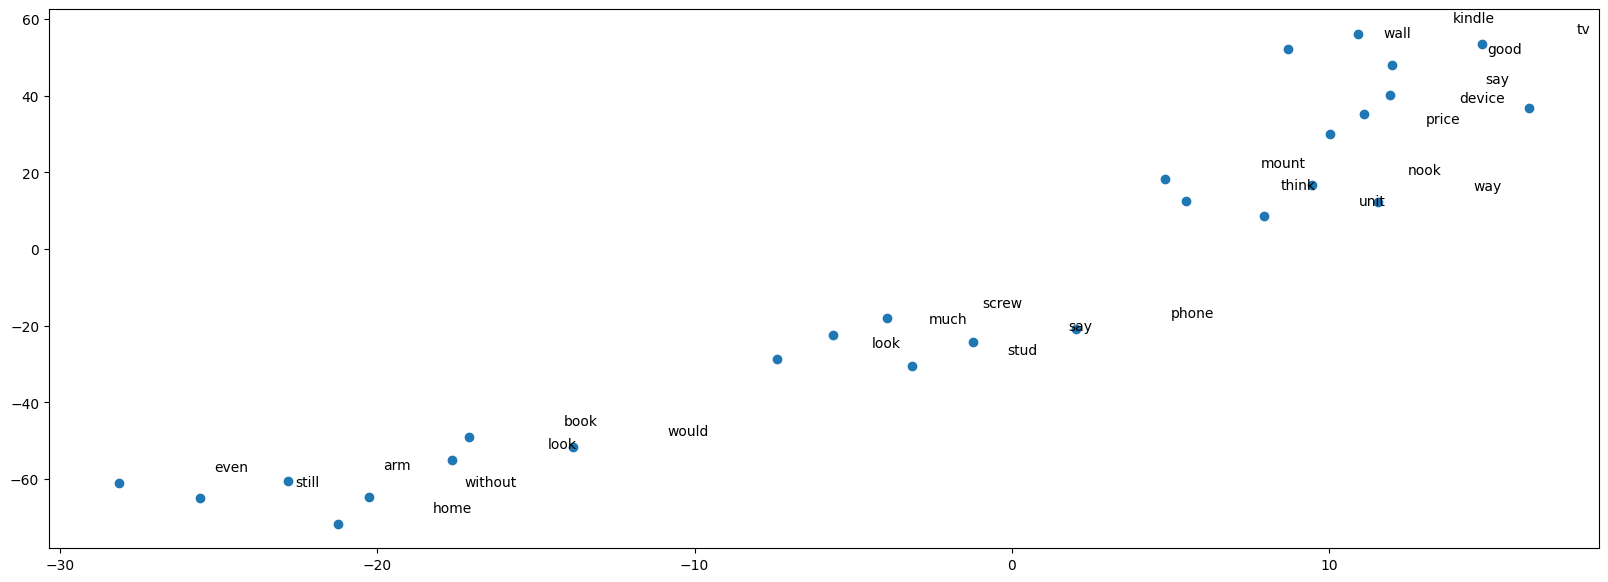

In [74]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

sample_vecs = word_vec.wv[set(word_bank)]
sample_tsne = tsne.fit_transform(sample_vecs)
tsne_x = sample_tsne[:, 0]
tsne_y = sample_tsne[:, 1]

f, axes = plt.subplots(figsize=(20,7))
ax = plt.scatter(x=tsne_x, y=tsne_y)

for label, x, y in zip(word_bank, tsne_x, tsne_y):
    plt.annotate(label, xy=(x+3, y+3))

plt.show()

### Word Algebra ###
Since *Word2Vec* characterizes words into quantified tokens, we can consequently add or subtract word vectors together. To add is to combine the meaning of the components and to subtract is to take out the context of one token from another. The following are examples of this vector algebra and their similarity scores:

**Books + Touchscreen**

In [75]:
word_vec.wv.most_similar(positive=["books", "touchscreen"], \
                      negative=[], topn=1)

[('buy', 0.9996755123138428)]

**Cheap – Quality**

In [76]:
word_vec.wv.most_similar(positive=["cheap"], \
                      negative=["quality"], topn=1)

[('better', 0.0583585649728775)]

**Tablet – Phone**

In [77]:
word_vec.wv.most_similar(positive=["tablet"], \
                      negative=["phone"], topn=1)

[('satisfy', 0.05908816307783127)]

## Named-Entity Recognition ###
We've seen *gensim* perform word tagging to identify part-of-speech. Now we use *spaCy* to go further and identify what nouns in the documents refer to. Some Named-Entity Recognition (*NER*) classification tags include distinguishing persons, organizations, products, places, dates, etc.

In exploring *spaCy*, we'll be using the `most_helpful_text`, which is the highest-rated product review by Amazon users. The `helpful` series from the `df` dataframe is actually a list with its first element storing the number of *helpful* votes a review received, and the second element containing the total number of *helpful* and *not helpful* review votes.

In [79]:
helpful = df["helpful"].tolist()
most_helpful = max(helpful, key=lambda x: x[0])

most_helpful_idx = df["helpful"].astype(str) == str(most_helpful)
most_helpful_idx = df[most_helpful_idx].index

most_helpful_text = df["reviewText"].iloc[most_helpful_idx].values[0]

print(most_helpful_text)

I purchased the Kindle (Wi-Fi) and the original Nook (the B&W; one) and tried them out during the return period. While there were things about the Kindle I really liked (features that other reviewers on the Kindle site had written), the one thing that made me choose the Nook was the ability to borrow and read ebooks from my local library. Haven't been back to the library since!Now here comes the Nook Simple Touch Reader (Nook STR). I got one via pre-order when they came out in early June.  It has the same e-ink Pearl screen as the Kindle, so the screen contrast is no longer an issue. And wow, has the user interface improved over the original Nook! (which I thought was clunky) The entire e-ink Pearl screen has full touchscreen capability. On both the Kindle and the original Nook, I felt myself wanting to touch the screen to select a book to read, instead of using the buttons (on the Kindle) or the LCD touchscreen (on the original Nook) to highlight and select the desired ebook. On the N

We use `ner_dict`, a dictionary initialized as a list, to segregate the nouns in the `most_helpful_text` into the NER tags.

In [80]:
%%time
import spacy

from collections import defaultdict

ner = spacy.load("en_core_web_sm")

ner_helpful = ner(most_helpful_text)

ner_dict = defaultdict(list)
for entity in ner_helpful.ents:
    ner_dict[entity.label_].append(entity)

for NER, name in ner_dict.items():
    print(f"{NER}:\n{name}\n")

ORG:
[the Kindle (Wi-Fi, B&W, Nook, the Nook Simple Touch Reader (Nook STR, Nook, LCD, iPhone, iPad, iPhone, Nook, LCD, B&N, B&N, Adobe Digital Editions, Adobe Digital Editions, B&N]

PERSON:
[Nook, Nook, Library]

CARDINAL:
[one, one, one, One]

DATE:
[early June, six weeks, Every Friday]

PRODUCT:
[Pearl, Pearl]

LOC:
[the Nook STR, the Nook STR, Nook ST, The Nook STR]

CPU times: user 7.03 s, sys: 1.18 s, total: 8.21 s
Wall time: 15.6 s


We use `displaCy` to visualize the tags in the review.

In [81]:
from spacy import displacy

displacy.render(ner_helpful, style="ent", jupyter=True)

## Dependency Tree ##
The capability of *spaCy'*s NER is based on deciphering the structure of the sentence by breaking down how tokens interact with and influence each other. Below is the dependency trees of the first three sentences of the `most_helpful_text`.

In [82]:
def ner_displacy(sentence):
    ner_sentence = ner(sentence)
    displacy.render(ner_sentence, jupyter=True, \
                    options={"compact": False, \
                             "distance": 90, \
                             "word_spacing":20, \
                             "arrow_spacing":10, \
                             "arrow_stroke": 2, \
                             "arrow_width": 5})

for sentence in globals()["most_helpful_text"].split(".")[0:3]:
    ner_displacy(sentence)

In [83]:
def ner_displacy(sentence):
    ner_sentence = ner(sentence)
    displacy.render(ner_sentence, jupyter=True, \
                    options={"compact": False, \
                             "distance": 90, \
                             "word_spacing":20, \
                             "arrow_spacing":10, \
                             "arrow_stroke": 2, \
                             "arrow_width": 5})

for sentence in most_helpful_text.split(".")[0:3]:
    ner_displacy(sentence)

## Topic Modeling ##


Because Latent Dirichlet Allocation (*LDA*) can cluster documents together according to topic, the reviews can be classified and grouped according to the type of electronics product they correspond to. The product reviews will have weights assigned to each of the topic and the topics themselves will have weights on every token. As it is a clustering-based model, LDA is unsupervised and only the `num_topics` is configurable.

The following are the top five words that are salient to the first group of product reviews.

In [84]:
%%time
import multiprocessing

from gensim.models.ldamulticore import LdaMulticore

cores = multiprocessing.cpu_count()

num_topics = 10
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=vocabulary, \
                       passes=5, workers=cores, random_state=42)

for token, frequency in bow_lda.show_topic(0, topn=5):
    print(token, frequency)

mount 0.04405301
tv 0.037602767
wall 0.018611204
one 0.013386697
screw 0.010635876
CPU times: user 4.02 s, sys: 294 ms, total: 4.31 s
Wall time: 4.57 s


The words that are the most characteristic of the topics are indeed thematic. And each word group do conjure a distinct topic.

In [85]:
for topic in range(0, num_topics):
    print(f"\nTopic {topic+1}:")
    for token, frequency in bow_lda.show_topic(topic, topn=5):
        print(f" {token}, {frequency}")


Topic 1:
 mount, 0.044053010642528534
 tv, 0.03760276734828949
 wall, 0.018611203879117966
 one, 0.013386696577072144
 screw, 0.010635876096785069

Topic 2:
 get, 0.013375766575336456
 book, 0.012882485054433346
 use, 0.01127245370298624
 nook, 0.00866546481847763
 one, 0.008285414427518845

Topic 3:
 nook, 0.010756192728877068
 use, 0.009679947979748249
 tablet, 0.009053829126060009
 unit, 0.007829190231859684
 work, 0.007458182517439127

Topic 4:
 mount, 0.01784946396946907
 tv, 0.015713104978203773
 wall, 0.011944951489567757
 book, 0.008855507709085941
 purchase, 0.008844028227031231

Topic 5:
 nook, 0.01784347929060459
 get, 0.013615346513688564
 tablet, 0.012500695884227753
 device, 0.01248708926141262
 android, 0.009511766023933887

Topic 6:
 tv, 0.01891189254820347
 mount, 0.014753065072000027
 great, 0.01445719227194786
 nook, 0.010738718323409557
 work, 0.010737664066255093

Topic 7:
 nook, 0.042690031230449677
 tablet, 0.01948462426662445
 book, 0.016432082280516624
 kindle